<a href="https://colab.research.google.com/github/Trish-Pat/Credit-Card-Fraud-Detection-and-Prevention-Hackathon/blob/analysis/Credit_Card_Fraud_Detection_and_Prevention_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit-Card-Fraud-Detection-and-Prevention-Hackathon
<img src="https://github.com/devtlv/studentsGitHub/blob/master/Images%20cours%20%C3%A0%20h%C3%A9berger%20-%2006.03.2024/Week%204%20-%20Databases/W4D5/banner-hackathon-design-sprintlike-event-260nw-1418226719.jpg?raw=true">

## Hackathon Subject 1: Credit Card Fraud Detection and Prevention
### Description:

In this hackathon, you are tasked with analyzing a dataset focused on credit card transactions to detect fraudulent activities. As a data analyst working within a financial institution, your goal is to leverage the “Credit Card Fraud Detection” dataset to uncover patterns that distinguish between fraudulent and non-fraudulent transactions. This dataset is highly imbalanced, as fraudulent transactions are rare compared to legitimate ones. Your challenge is to apply various data analysis and machine learning techniques to accurately identify fraudulent transactions, while minimizing false positives.


The dataset includes anonymized features resulting from a PCA dimensionality reduction process to protect sensitive information. Your task will involve exploring these features, understanding their relationships, and building predictive models to enhance the institution’s fraud detection capabilities.

Data source: Credit Card Fraud Detection - Anonymized credit card transactions labeled as fraudulent or genuine

## Key Tasks:

1. Exploratory Data Analysis (EDA):

* Perform an in-depth analysis of the dataset to understand the distribution of variables and identify any correlations.
* Explore the relationship between the Amount, Time, and the anonymized features (V1-V28) with the Class label.

2. Data Preprocessing:

* Handle missing values, if any, and apply normalization or standardization techniques to prepare the data for modeling.
* Address the class imbalance using techniques such as oversampling, undersampling, or SMOTE (Synthetic Minority Over-sampling Technique).

3. Feature Engineering:

* Analyze the importance of the features (V1-V28) in predicting fraud and consider creating new features or aggregating existing ones for better model performance.

4. Predictive Modeling:

* Develop machine learning models to classify transactions as fraudulent or non-fraudulent. Consider using algorithms like Logistic Regression, Random Forest, XGBoost, or Neural Networks.
* Evaluate the models using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC curve, particularly focusing on minimizing false positives.

5. Visualization:

* Use Matplotlib and Seaborn to create visualizations that highlight the key findings of your analysis (you can also create them directly in PowerBI or Tableau).
* Use Tableau or PowerBI to build an interactive dashboard that can be used by stakeholders to monitor fraudulent activities in real-time.
Bonus: Fraud Prevention Strategy:

Propose a strategy for real-time fraud detection and prevention, incorporating your findings from the dataset.
Suggest additional data points or external data sources that could be integrated to enhance the accuracy of fraud detection.

### Deliverables:

Participants are expected to submit a comprehensive report detailing their findings, insights, and recommendations. Additionally, a presentation should be prepared to showcase key results and strategies to a panel of judges. An interactive dashboard should be provided to demonstrate the real-time fraud detection capabilities.

### Evaluation Criteria:

Judges will assess submissions based on the depth of analysis, creativity in feature engineering, the effectiveness of the visualization techniques, and the overall impact of proposed recommendations on enhancing the institution’s fraud detection and prevention efforts.

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,
                           confusion_matrix,
                           roc_auc_score,
                           precision_score,
                           recall_score,
                           f1_score,
                           accuracy_score)
from imblearn.over_sampling import SMOTE

%matplotlib inline

# Set style for all visualizations
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 6)

In [26]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.shape

(284807, 31)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [32]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [33]:
df.duplicated().sum()

np.int64(1081)

In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [35]:
df = df.sample(n=10000, random_state=42)

## Exploratory Data Analysis (EDA)

* Checks dataset shape and missing values.
* Examines class distribution (fraud vs non-fraud).
* Visualizes the severe class imbalance common in fraud datasets.

In [36]:
# Exploratory Data Analysis (EDA)
print("Dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nClass distribution:")
print(df['Class'].value_counts())

Dataset shape: (10000, 31)

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
Class
0    9984
1      16
Name: count, dtype: int64


<ipython-input-37-525c3dd95540>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, palette='viridis')


Text(0, 0.5, 'Count')

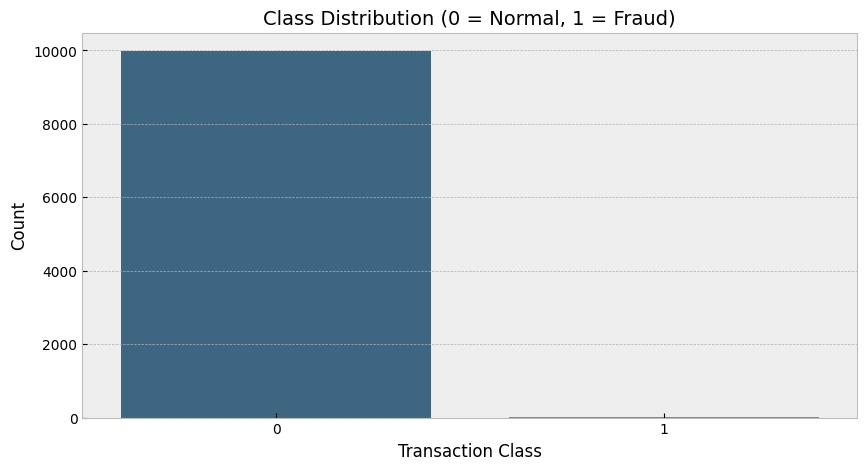

In [37]:
# 1. Class Distribution Visualization
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)', fontsize=14)
plt.xlabel('Transaction Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

<ipython-input-38-6a42aa66c905>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette='coolwarm')


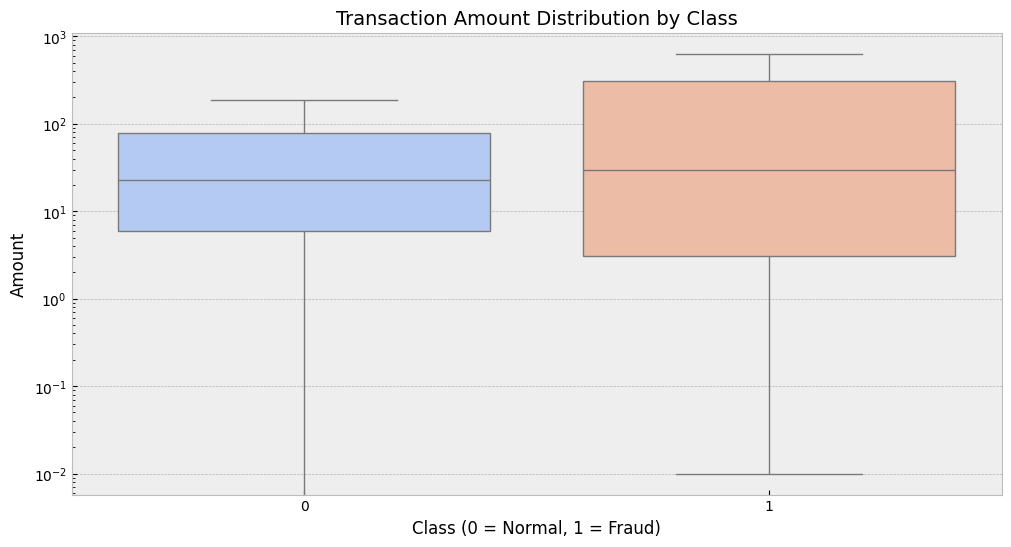

In [38]:
# Add percentage annotations
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.05*total
    ax.annotate(percentage, (x, y), ha='center')
plt.show()


# 2. Transaction Amount Distribution by Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette='coolwarm')
plt.title('Transaction Amount Distribution by Class', fontsize=14)
plt.xlabel('Class (0 = Normal, 1 = Fraud)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.yscale('log')  # Log scale for better visualization
plt.show()

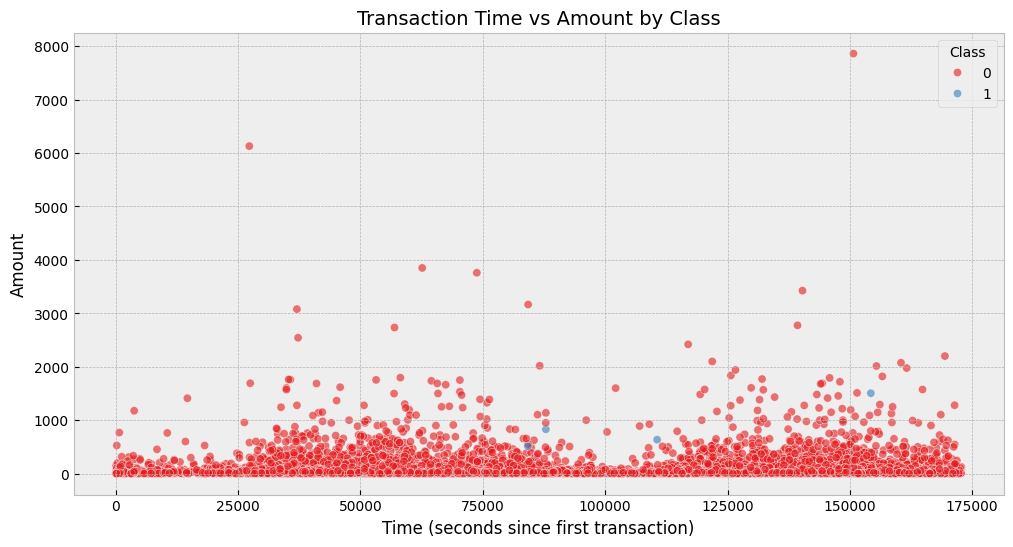

In [39]:
# 3. Time vs Amount Scatter Plot Colored by Class
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.6, palette='Set1')
plt.title('Transaction Time vs Amount by Class', fontsize=14)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(title='Class')
plt.show()

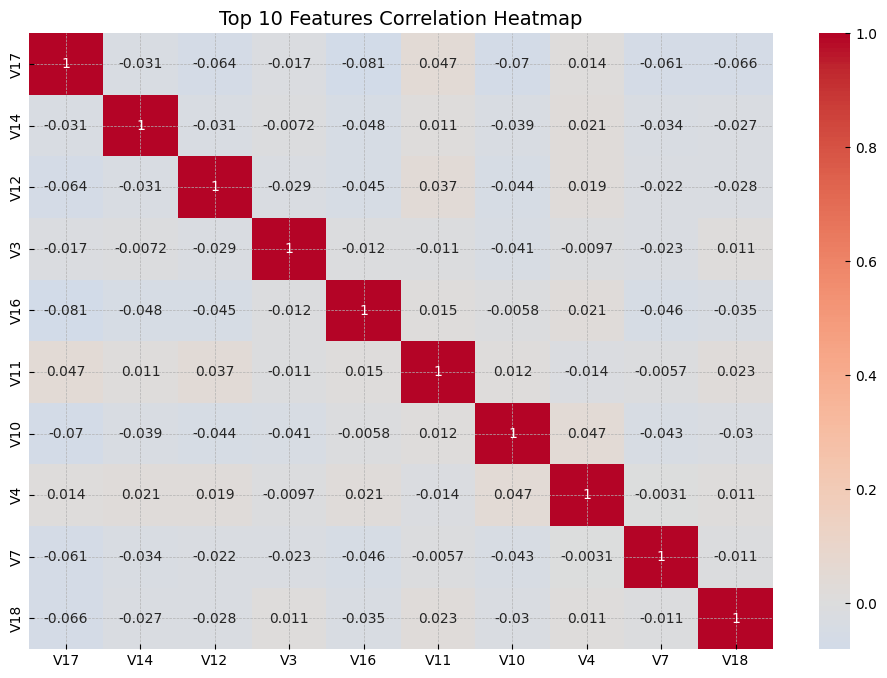

In [40]:
# 4. Correlation Heatmap (Top 10 Features)
plt.figure(figsize=(12, 8))
corr = df.corr()
# Get top 10 features most correlated with Class
top_features = corr['Class'].abs().sort_values(ascending=False).index[1:11]
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Top 10 Features Correlation Heatmap', fontsize=14)
plt.show()

## Data Preprocessing:

* Scales the 'Time' and 'Amount' features for better model performance
* Splits data into train/test sets before applying SMOTE to prevent data leakage
* Uses SMOTE to address class imbalance by creating synthetic fraud samples

In [41]:
# Data Preprocessing
# Scale Time and Amount features
scaler = StandardScaler()
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
if 'Amount' in df.columns:
    df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [42]:
# Handle class imbalance with SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

# Split data before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

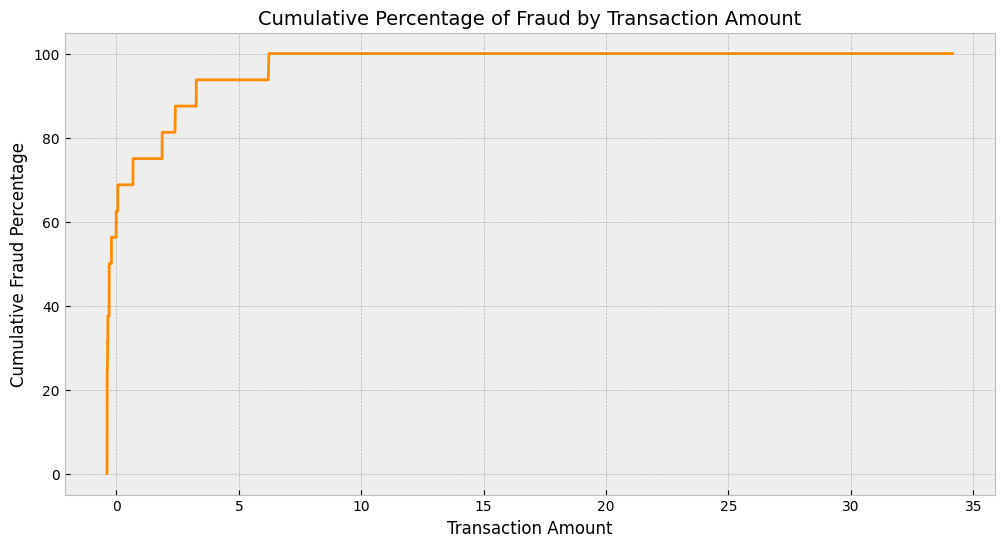

In [43]:
# Cumulative Fraud Percentage by Transaction Amount
if 'Amount' in df.columns:
    df_sorted = df.sort_values('Amount')
    df_sorted['cum_fraud'] = df_sorted['Class'].cumsum() / df_sorted['Class'].sum() * 100

    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['Amount'], df_sorted['cum_fraud'], color='darkorange')
    plt.title('Cumulative Percentage of Fraud by Transaction Amount', fontsize=14)
    plt.xlabel('Transaction Amount', fontsize=12)
    plt.ylabel('Cumulative Fraud Percentage', fontsize=12)
    plt.grid(True)
    plt.show()

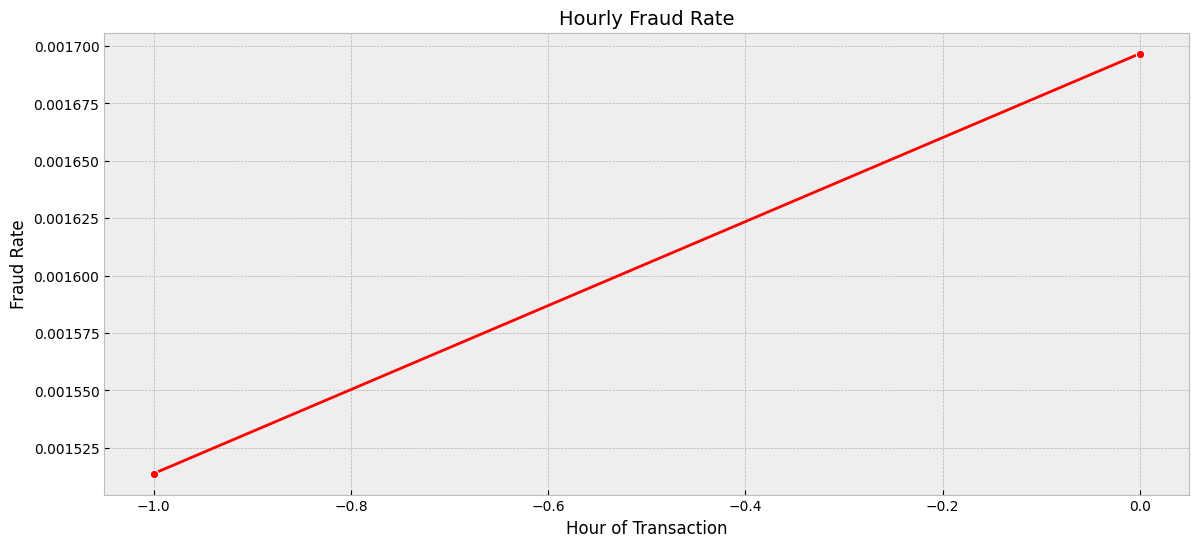

In [44]:
# Hourly Fraud Rate (Assuming Time is in seconds)
if 'Time' in df.columns:
    df['Hour'] = df['Time'] // 3600  # Convert seconds to hours

    hourly_fraud = df.groupby('Hour')['Class'].mean().reset_index()

    plt.figure(figsize=(14, 6))
    sns.lineplot(x='Hour', y='Class', data=hourly_fraud, color='red', marker='o')
    plt.title('Hourly Fraud Rate', fontsize=14)
    plt.xlabel('Hour of Transaction', fontsize=12)
    plt.ylabel('Fraud Rate', fontsize=12)
    plt.grid(True)
    plt.show()

In [45]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Model Training & Evaluation:

* Implements Logistic Regression (simple baseline model)
* Implements Random Forest (more complex model that often works well)
* Evaluates using classification report and ROC AUC score
* Shows confusion matrices for both models

In [46]:
# Model Training - Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test)

### View Predictions

In [47]:
# Create a function to print predictions vs true labels
def print_predictions_vs_true(y_true, y_pred, model_name):
    print(f"\nPredictions vs True Labels - {model_name}")
    print("----------------------------------")
    results = pd.DataFrame({
        'True Label': y_true,
        'Predicted Label': y_pred
    })
    print(results.head(20))  # Print first 20 predictions for inspection
    print("\n")

# Print predictions for Logistic Regression
print_predictions_vs_true(y_test, y_pred_lr, "Logistic Regression")


Predictions vs True Labels - Logistic Regression
----------------------------------
        True Label  Predicted Label
273508           0                0
234022           0                0
42421            0                0
202969           0                0
26303            0                0
124431           0                0
81148            0                0
133516           0                0
177337           0                0
282311           0                0
147607           0                0
94547            0                0
193696           0                0
33357            0                0
160822           0                0
113339           0                0
237354           0                0
49834            0                0
75455            0                0
208652           0                0




In [48]:
# Additional: Print only the misclassified cases
def print_misclassified(y_true, y_pred, model_name):
    misclassified = np.where(y_true != y_pred)
    print(f"\nMisclassified Cases - {model_name} (Total: {len(misclassified[0])})")
    print("----------------------------------")
    results = pd.DataFrame({
        'True Label': y_true.iloc[misclassified],
        'Predicted Label': y_pred[misclassified]
    })
    print(results.head(20))  # Print first 20 misclassifications
    print("\n")

# Print misclassified cases for both models
print_misclassified(y_test, y_pred_lr, "Logistic Regression")


Misclassified Cases - Logistic Regression (Total: 7)
----------------------------------
        True Label  Predicted Label
268715           0                1
162601           0                1
181966           1                0
18115            0                1
200377           0                1
158656           0                1
150254           0                1




In [49]:
# Model Evaluation
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2995
           1       0.40      0.80      0.53         5

    accuracy                           1.00      3000
   macro avg       0.70      0.90      0.77      3000
weighted avg       1.00      1.00      1.00      3000

ROC AUC Score: 0.8989983305509182


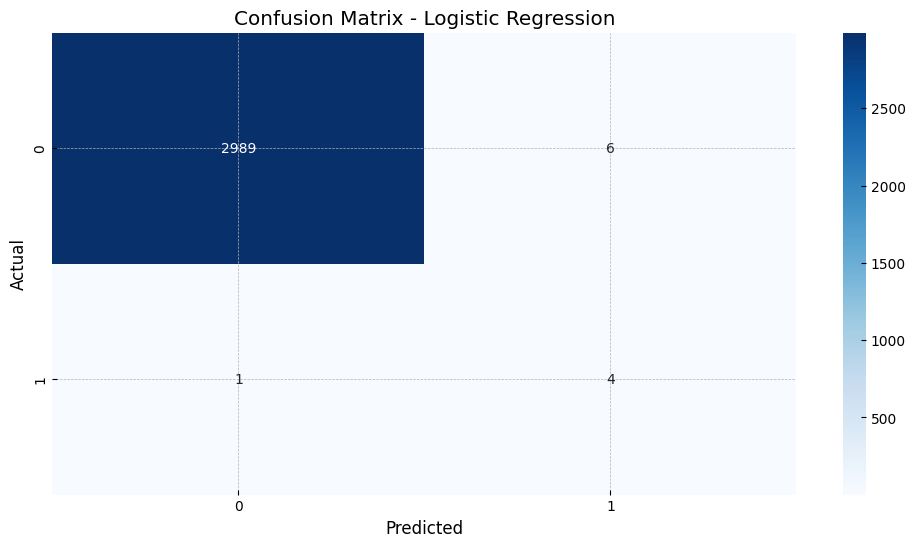

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Model Training - Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

In [52]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2995
           1       1.00      0.80      0.89         5

    accuracy                           1.00      3000
   macro avg       1.00      0.90      0.94      3000
weighted avg       1.00      1.00      1.00      3000

ROC AUC Score: 0.9


## Feature Importance:

Visualizes which features contribute most to fraud detection

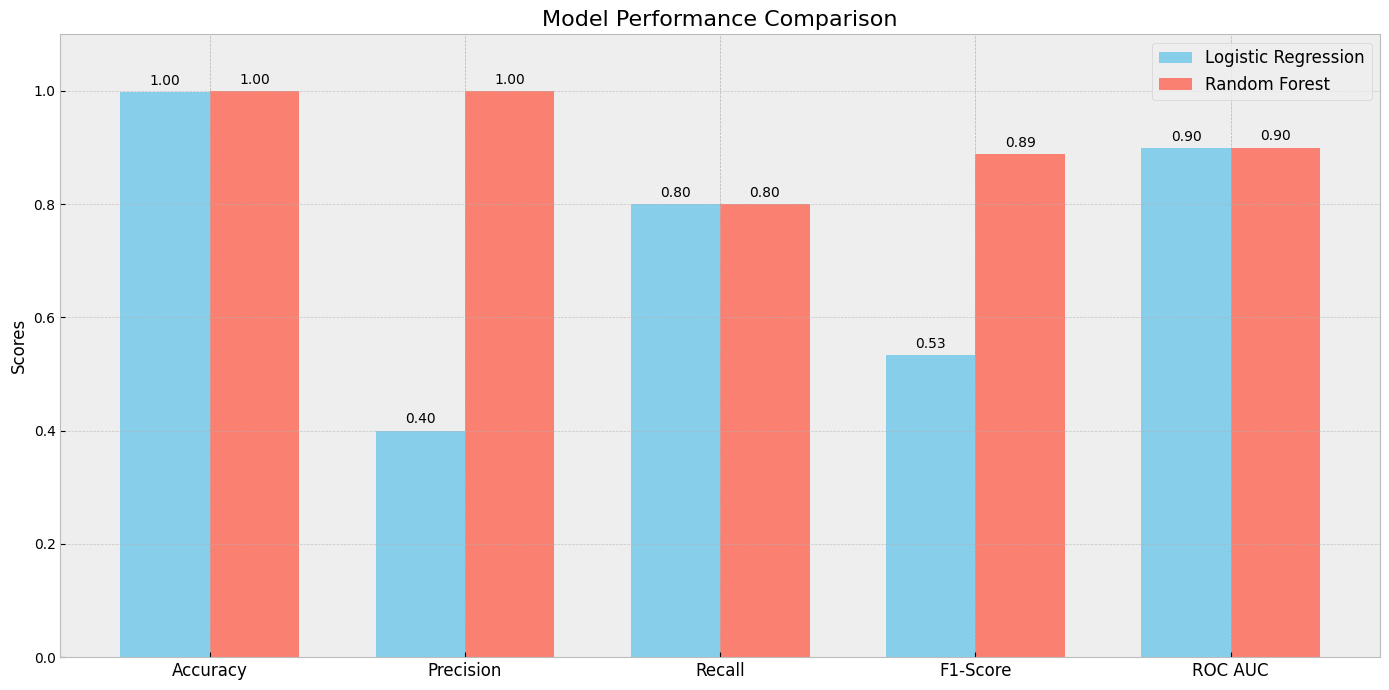

In [53]:
# Model Performance Comparison - Enhanced with all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
lr_metrics = [accuracy_score(y_test, y_pred_lr),
              precision_score(y_test, y_pred_lr),
              recall_score(y_test, y_pred_lr),
              f1_score(y_test, y_pred_lr),
              roc_auc_score(y_test, y_pred_lr)]
rf_metrics = [accuracy_score(y_test, y_pred_rf),
              precision_score(y_test, y_pred_rf),
              recall_score(y_test, y_pred_rf),
              f1_score(y_test, y_pred_rf),
              roc_auc_score(y_test, y_pred_rf)]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, rf_metrics, width, label='Random Forest', color='salmon')

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()


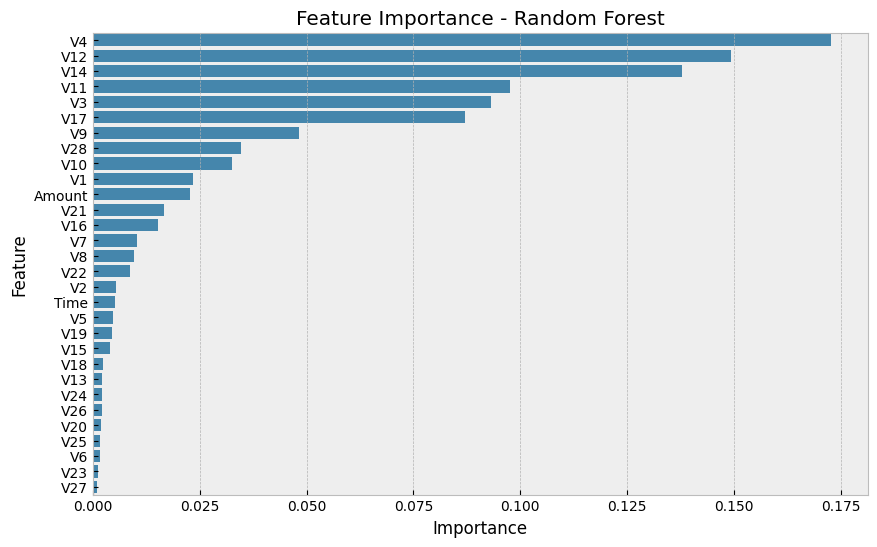

In [54]:
# Feature Importance (Random Forest)
if len(X.columns) > 1:  # Only if we have multiple features
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title('Feature Importance - Random Forest')
    plt.show()

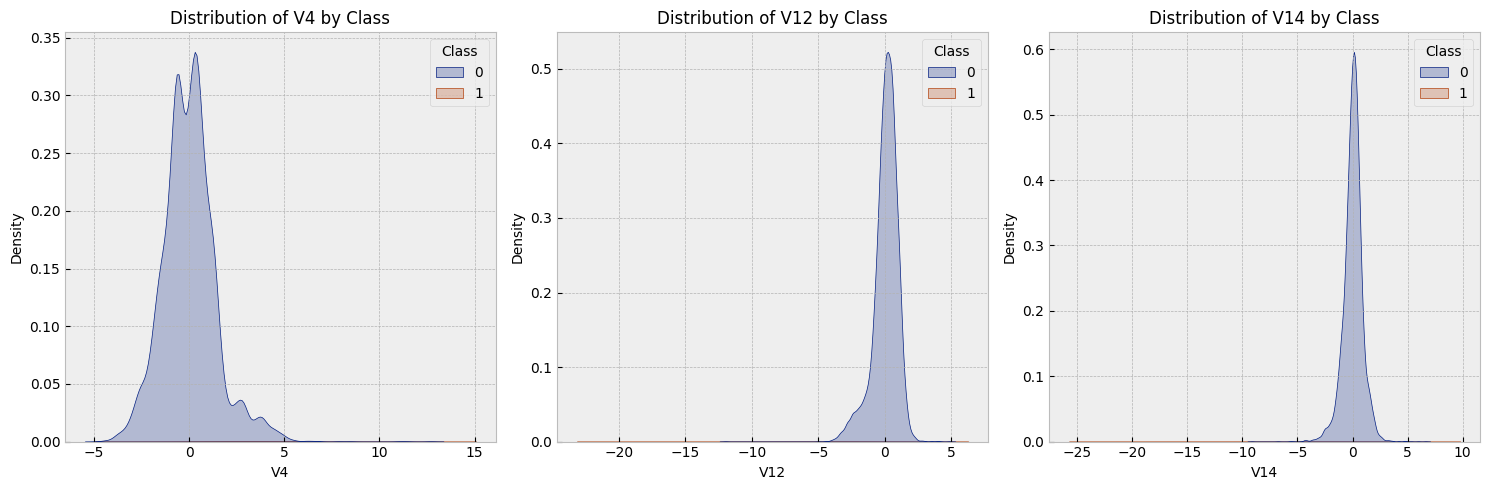

In [55]:
# Distribution of Top 3 Important Features
if len(X.columns) > 1:  # Only if we have multiple features
    top_3_features = feature_imp['Feature'].head(3).values

    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(top_3_features, 1):
        plt.subplot(1, 3, i)
        sns.kdeplot(data=df, x=feature, hue='Class', palette='dark', fill=True)
        plt.title(f'Distribution of {feature} by Class', fontsize=12)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Density', fontsize=10)
    plt.tight_layout()
    plt.show()